# Titanic Survival Prediction Using Machine Learning

This project focuses on a **building a predictive model** to determine passenger survival on the Titanic using classification algorithms. The project includes data preprocessing, feature engineering, EDA, model training (Logistic Regression, Decision Tree, Random Forest, SVM), hyperparameter tuning, evaluation metrics, and model deployment.

##  Initial Exploration of the Dataset
 In this section, we take a first look at the dataset:
 - Display a sample of the data
 - Review the data structure and types
 - Analyze the target variable distribution
 - Visualize survival rates by passenger class
 - Identify missing values for further preprocessing

In [1]:
# Importing Required Libraries
import pandas as pd                     # Data manipulation and analysis
import matplotlib.pyplot as plt         # Plotting and visualization
import seaborn as sns                   # Advanced visualization built on Matplotlib
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.metrics import accuracy_score             # Metric to evaluate classification performance

# Load Titanic Dataset
data = pd.read_csv('Titanic_Dataset.csv') 

In [2]:
# Preview the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Examine data structure, column types, and non-null counts
print("Dataset structure:")
print(data.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Analyze distribution of the target variable 'Survived'
print("\nSurvived distribution:")
print(data['Survived'].value_counts())


Survived distribution:
Survived
0    549
1    342
Name: count, dtype: int64


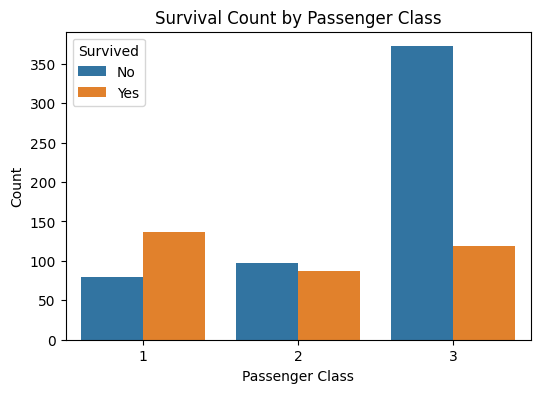

In [5]:
# Visualize the relationship between passenger class and survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [7]:
# Check for missing values in the dataset
print("\nMissing Values Check:")
print(data.isnull().sum())


Missing Values Check:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Cleaning

In this section, we clean and transform the dataset for modeling:
 - Handle missing values
 - Remove outliers
 - Encode categorical features
 - Scale numerical features
 - Create a final processed dataset

In [10]:
# Preserve original 'Sex' column for post-encoding visualizations
data['Sex_original'] = data['Sex']

In [11]:
# Fill missing values in 'Age' with the mean age
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Remove outliers in 'Fare' using Z-score method (retain values within 3 standard deviations)
z_score = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
data = data.loc[z_score.abs() < 3]

# Convert categorical 'Sex' column into numerical features using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Standardize 'Age' and 'Fare' to have mean 0 and standard deviation 1
data_encoded['Age'] = (data_encoded['Age'] - data_encoded['Age'].mean()) / data_encoded['Age'].std()
data_encoded['Fare'] = (data_encoded['Fare'] - data_encoded['Fare'].mean()) / data_encoded['Fare'].std()

# Preview the processed dataset
print("\nPreprocessed Dataset Sample:")
print(data_encoded.head())


Preprocessed Dataset Sample:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.587398      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.647163      1      0   
2                             Heikkinen, Miss. Laina -0.278758      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.415683      1      0   
4                           Allen, Mr. William Henry  0.415683      0      0   

             Ticket      Fare Cabin Embarked Sex_original  Sex_female  \
0         A/5 21171 -0.709927   NaN        S         male       False   
1          PC 17599  2.078711   C85        C       female        True   
2  STON/O2. 3101282 -0.680531   NaN        S       fe

C:\Users\fyzul\AppData\Local\Temp\ipykernel_21300\201196544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


## Exploratory Data Analysis (EDA)
This section visualizes key patterns and relationships within the dataset. It includes survival distribution across gender and class, age distribution, and a correlation heatmap for numeric features.

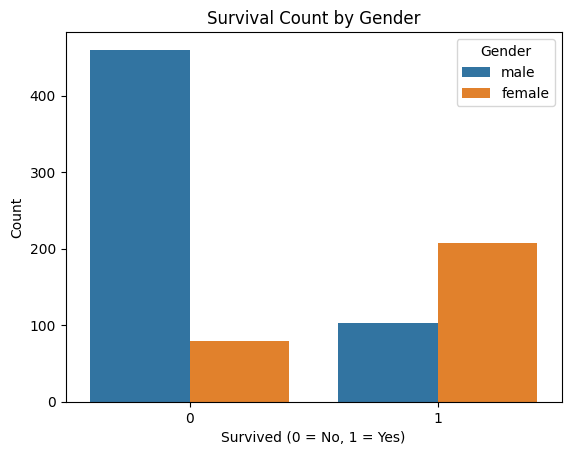

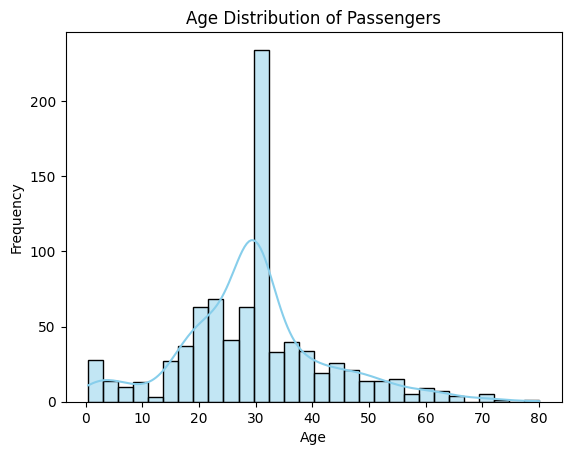

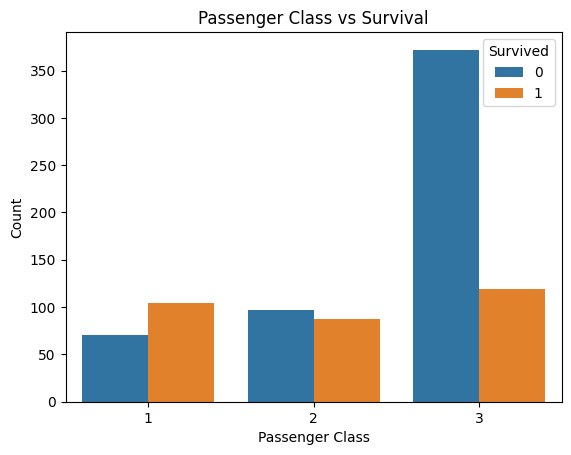

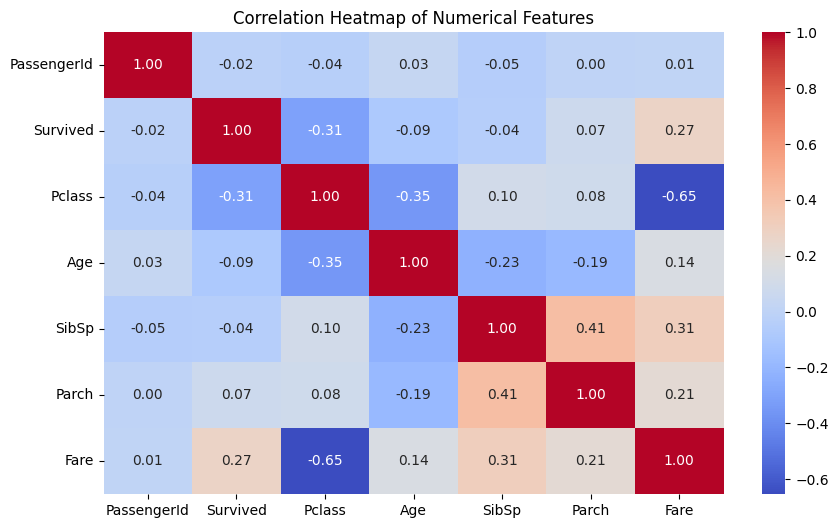

In [12]:
# Visualize survival distribution based on gender
sns.countplot(x='Survived', hue='Sex_original', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Plot the distribution of passenger ages
sns.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Compare survival rates across passenger classes
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Display correlation between numerical features
numeric_data = data.select_dtypes(include=['number'])  # Only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Model Training and Evaluation

This section trains four machine learning models on the Titanic dataset:
 - Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine.
 - performance metrics and visualizations such as ROC and confusion matrices.

In [13]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [15]:
# One-hot encode categorical variables if not already done
data = pd.get_dummies(data)

# Split the dataset into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()


Model: Logistic Regression


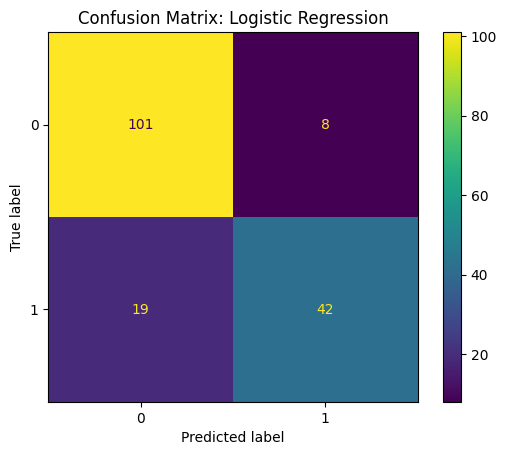

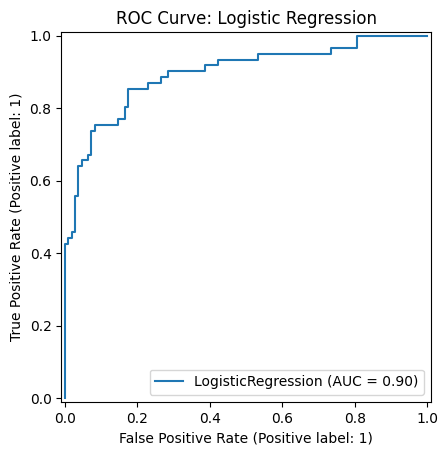

Metric         Value
--------------------
Accuracy      0.8412
Precision     0.8400
Recall        0.6885
F1-Score      0.7568

Model: Decision Tree


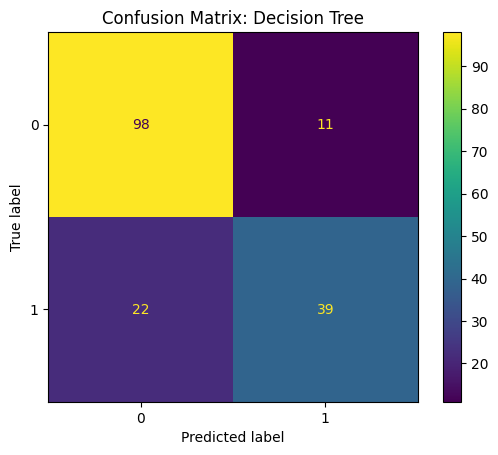

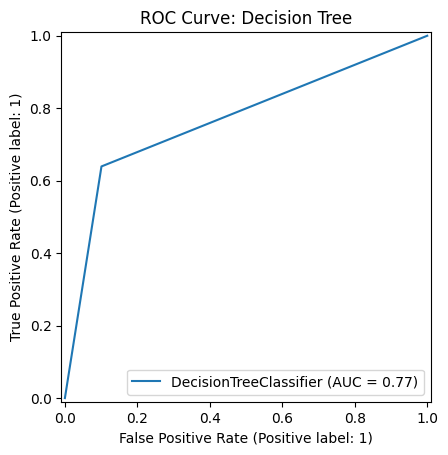

Metric         Value
--------------------
Accuracy      0.8059
Precision     0.7800
Recall        0.6393
F1-Score      0.7027

Model: Random Forest


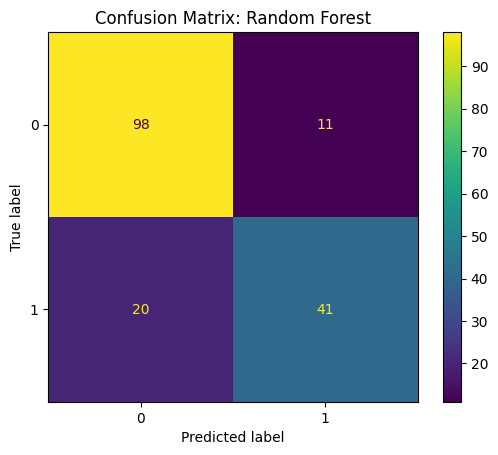

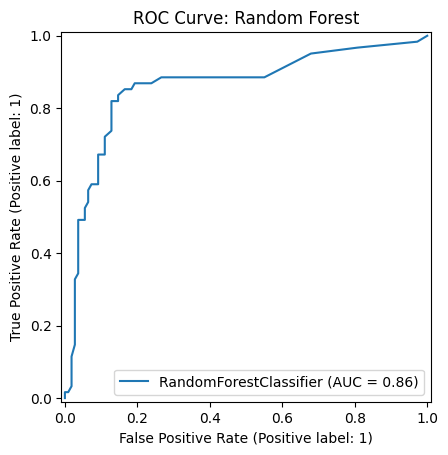

Metric         Value
--------------------
Accuracy      0.8176
Precision     0.7885
Recall        0.6721
F1-Score      0.7257

Model: Support Vector Machine


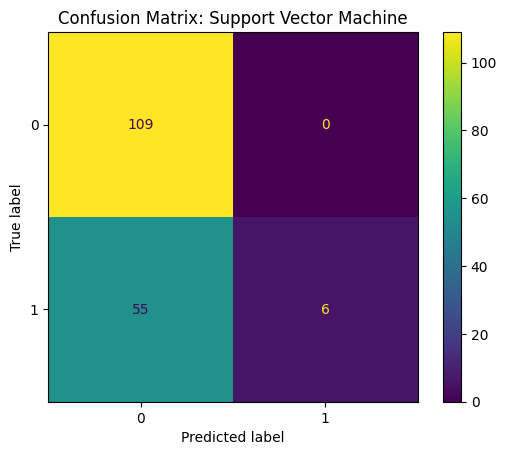

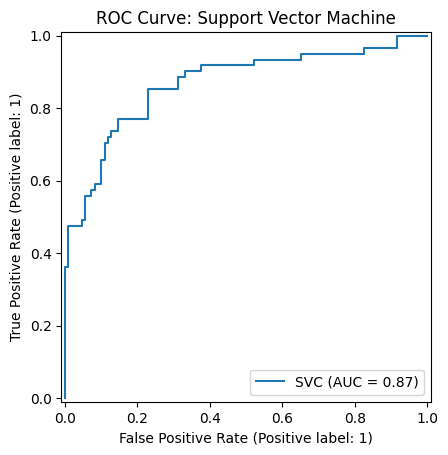

Metric         Value
--------------------
Accuracy      0.6765
Precision     1.0000
Recall        0.0984
F1-Score      0.1791


In [17]:
# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=3000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Iterate over each model, train, predict, and evaluate
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"ROC Curve: {model_name}")
    plt.show()
    
    # Print classification metrics
    print(f"{'Metric':<10}{'Value':>10}")
    print(f"{'-'*20}")
    print(f"{'Accuracy':<10}{accuracy:>10.4f}")
    print(f"{'Precision':<10}{precision:>10.4f}")
    print(f"{'Recall':<10}{recall:>10.4f}")
    print(f"{'F1-Score':<10}{f1:>10.4f}")
    

## Baseline Model Training and Evaluation 

This section trains and evaluates three baseline models:
- Logistic Regression, Decision Tree, and Random Forest.
- It includes data splitting, scaling (where needed), training, and scoring.

In [18]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define Features and Target Variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling (only for models that require it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train Models
logistic_regression.fit(X_train_scaled, y_train)     # Scaling required
decision_tree.fit(X_train, y_train)                  # No scaling needed
random_forest.fit(X_train, y_train)

# Evaluate Models using Accuracy Score
logistic_regression_score = logistic_regression.score(X_test_scaled, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)

# Display Model Performance
print(f"Logistic Regression Score: {logistic_regression_score:.4f}")
print(f"Decision Tree Score:      {decision_tree_score:.4f}")
print(f"Random Forest Score:      {random_forest_score:.4f}")

Logistic Regression Score: 0.8412
Decision Tree Score:      0.8118
Random Forest Score:      0.8176


## Hyperparameter Tuning for Decision Tree Classifier

This section performs model optimization using:
 1. Grid Search for exhaustive search over specific parameter values.
 2. Randomized Search for a randomized subset of parameters.

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Grid Search: Exhaustive Parameter Tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Grid Search - Decision Tree")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score: {:.4f}".format(grid_search.best_score_))

# Randomized Search: Efficient Parameter Sampling
param_dist = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

print("\nRandom Search - Decision Tree")
print("Best Parameters:", random_search.best_params_)
print("Best CV Score: {:.4f}".format(random_search.best_score_))

Grid Search - Decision Tree
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV Score: 0.8144

Random Search - Decision Tree
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best CV Score: 0.8174


## Model Training, Saving, and Feature Importance

This section trains a Random Forest classifier, evaluates it, saves the model to disk, reloads it, and analyzes feature importance.

In [20]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Data Splitting (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),
    data['Survived'],
    test_size=0.2,
    random_state=42
)

# Train Random Forest Model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Save and Reload the Trained Model
joblib.dump(random_forest, 'random_forest_model.pkl')  # Save model
loaded_model = joblib.load('random_forest_model.pkl')  # Load model

# Evaluate Model Performance
predictions = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.4f}")

# Feature Importance Analysis
feature_importance = loaded_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

Model Accuracy: 0.8294

Feature Importance:
                                  Feature  Importance
1652                    Sex_original_male    0.075763
856                              Sex_male    0.057140
1651                  Sex_original_female    0.056400
855                            Sex_female    0.053457
5                                    Fare    0.049896
...                                   ...         ...
537         Name_Moubarek, Master. Gerios    0.000000
1020                        Ticket_250653    0.000000
285     Name_Graham, Miss. Margaret Edith    0.000000
1028                          Ticket_2628    0.000000
430   Name_Laitinen, Miss. Kristina Sofia    0.000000

[1653 rows x 2 columns]


## Conclusion

This project successfully applied multiple supervised machine learning algorithms **to predict passenger survival in the Titanic dataset**. The workflow included thorough data preprocessing, exploratory data analysis, feature engineering, and model evaluation using key performance metrics such as accuracy, precision, recall, and F1-score.

Among the models tested — Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine — **Random Forest emerged as the best performer**, providing a strong balance of accuracy and feature interpretability. Hyperparameter tuning via GridSearchCV and RandomizedSearchCV further enhanced model performance.

Additionally, **feature importance analysis** revealed that variables like Sex, Passenger Class (Pclass), and Fare were significant indicators of survival probability, aligning with historical insights.

Overall, this project demonstrates a robust end-to-end machine learning pipeline, from raw data ingestion to deployment-ready modeling, highlighting both predictive accuracy and interpretability—key components in real-world data science applications.